<a href="https://colab.research.google.com/github/kamaleshr800/Natural-Language-Processing/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_excel('/content/loan_prediction.xlsx')

# EDA

In [5]:
#printing the dataset

print(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
print(df.columns)   #extracting the columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [7]:
print(df.info())  #we get detailed info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.shape  #no of rows and columns

(614, 13)

In [9]:
print(df.describe())   #prints the numerical columns details

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
print(df.isnull().sum())  #Checking for NULL values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print(df.groupby('Loan_Status').count()) #grouping based on loan appproved or not

             Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
Loan_Status                                                                   
N                192     187      192         186        192            183   
Y                422     414      419         413        422            399   

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                        192                192         181               186   
Y                        422                422         411               414   

             Credit_History  Property_Area  
Loan_Status                                 
N                       179            192  
Y                       385            422  


In [12]:
#filling the null values of integer columns using mean and median
#using mean on loan amount to find average and fill it
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

#using median for credit history as most numbers lies between 0 and 1
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [13]:
print(df['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [15]:
print(df.isnull().sum()) #checking again

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
#dropping null values
df=df.dropna()

print(df.shape) #orinting new shape now

(554, 13)


In [17]:
#checking relationship between cariables whether loan is approved or not
columns=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']

for i in columns:
  print(pd.crosstab(df[str(i)],df['Loan_Status']))
  print('\n')

Loan_Status    N    Y
Gender               
Female        34   67
Male         138  315


Loan_Status    N    Y
Married              
No            72  120
Yes          100  262


Loan_Status   N    Y
Dependents          
0            99  220
1            34   61
2            22   72
3+           17   29


Loan_Status     N    Y
Education             
Graduate      125  306
Not Graduate   47   76


Loan_Status      N    Y
Self_Employed          
No             147  331
Yes             25   51


Loan_Status     N    Y
Property_Area         
Rural          63  100
Semi-urban      1    5
Semiurban      46  153
Urban          61  119
semiurban       1    5




# Data visualizations

<Axes: xlabel='Gender', ylabel='count'>

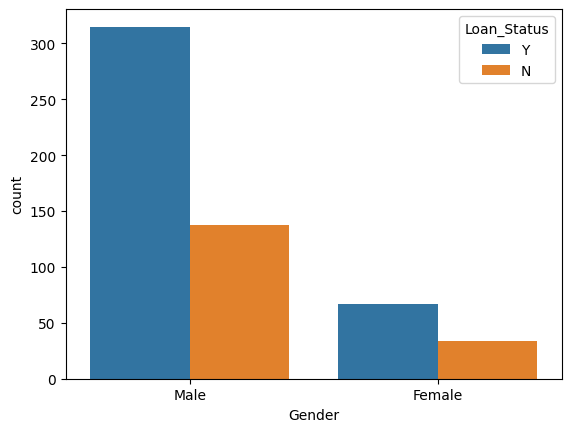

In [18]:
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

<Axes: xlabel='Married', ylabel='count'>

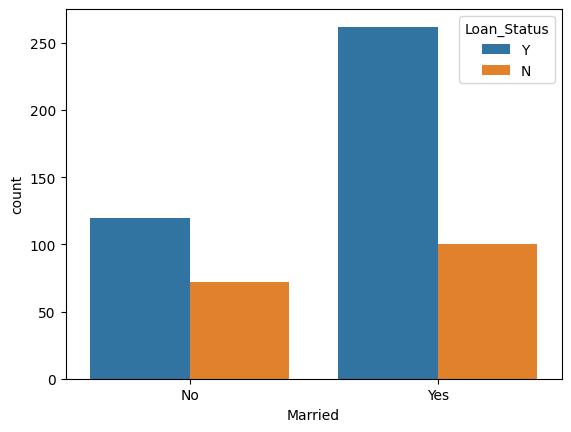

In [19]:
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

<Axes: xlabel='Dependents', ylabel='count'>

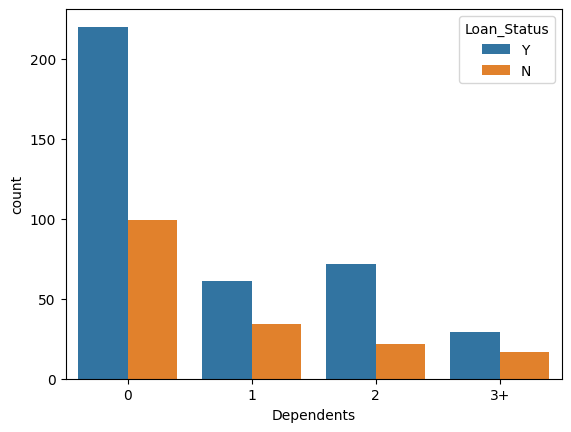

In [20]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])

<Axes: xlabel='Education', ylabel='count'>

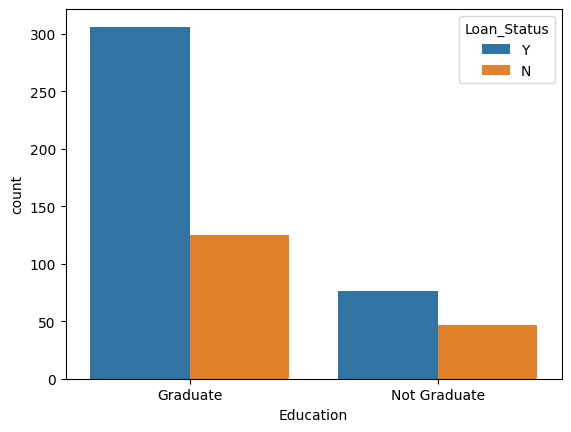

In [21]:
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

<Axes: xlabel='Self_Employed', ylabel='count'>

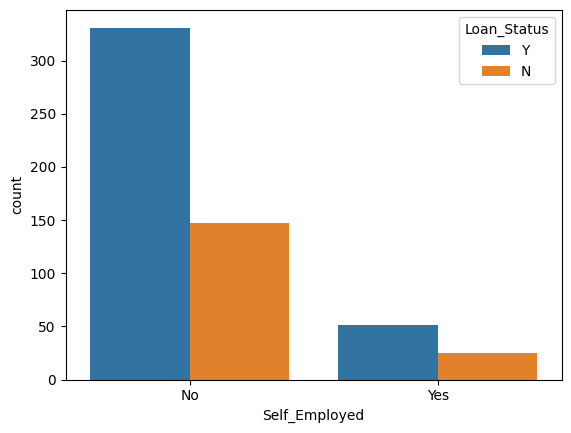

In [22]:
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

<Axes: xlabel='Property_Area', ylabel='count'>

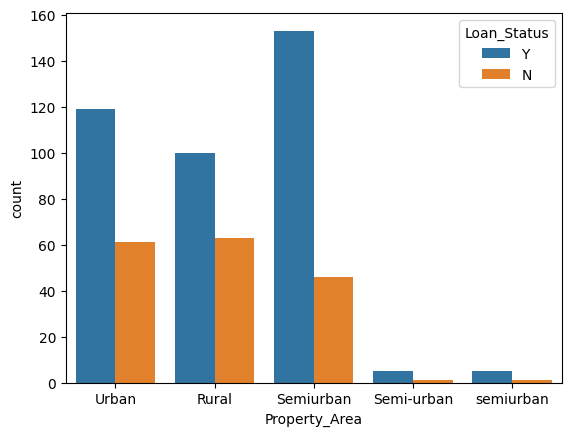

In [23]:
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

# label encoding categorical values to numerical values

In [24]:
columns=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
for i in columns:
  print(df[i].value_counts(),'\n')


Male      453
Female    101
Name: Gender, dtype: int64 

Yes    362
No     192
Name: Married, dtype: int64 

0     319
1      95
2      94
3+     46
Name: Dependents, dtype: int64 

Graduate        431
Not Graduate    123
Name: Education, dtype: int64 

No     478
Yes     76
Name: Self_Employed, dtype: int64 

Semiurban     199
Urban         180
Rural         163
Semi-urban      6
semiurban       6
Name: Property_Area, dtype: int64 

Y    382
N    172
Name: Loan_Status, dtype: int64 



In [25]:
#replacing strings to numberes
df['Gender'].replace({'Male','Female'},{0,1},inplace=True)
df['Married'].replace({'Yes','No'},{1,0},inplace=True)
df['Education'].replace({'Graduate','Not Graduate'},{1,0},inplace=True)
df['Self_Employed'].replace({'No','Yes'},{0,1},inplace=True)
df['Dependents'].replace({'0','1','2','3+'},{0,1,2,3},inplace=True)

In [26]:
#using labelencoder for encoding
encoder=LabelEncoder()

df['Property_Area']=encoder.fit_transform(df['Property_Area'])
df['Loan_Status']=encoder.fit_transform(df['Loan_Status'])

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            554 non-null    object 
 1   Gender             554 non-null    int64  
 2   Married            554 non-null    int64  
 3   Dependents         554 non-null    int64  
 4   Education          554 non-null    int64  
 5   Self_Employed      554 non-null    int64  
 6   ApplicantIncome    554 non-null    int64  
 7   CoapplicantIncome  554 non-null    float64
 8   LoanAmount         554 non-null    float64
 9   Loan_Amount_Term   554 non-null    float64
 10  Credit_History     554 non-null    float64
 11  Property_Area      554 non-null    int64  
 12  Loan_Status        554 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 60.6+ KB


# Divide the dataset into training and test datasets

In [28]:
X=df.iloc[:,1:-1].values
Y=df.iloc[:,-1].values

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=2)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(443, 11) (111, 11) (443,) (111,)


# Build the Logistic Regression model

In [30]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train) #training model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred=Lr.predict(x_test) #predicting for test data

In [37]:
#printing acc
print(accuracy_score(y_pred,y_test))
train_pred=Lr.predict(x_train)
print(accuracy_score(train_pred,y_train))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

0.8108108108108109
0.8036117381489842
confusion_matrix
 [[21  8]
 [13 69]]


# decision tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dc=RandomForestClassifier()

In [34]:
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

In [35]:
print(accuracy_score(y_pred,y_test)
print(confusion_matrix(y_pred,y_test))

0.8108108108108109
[[21  8]
 [13 69]]
